In [1]:
#pandas is imported to read the csv file and perform preprocessing on the dataset.
import pandas
#matlpotlib is used to visualize the plot
import matplotlib.pyplot as plt
#MinMaxScalar is used to normalize the value before training
from sklearn.preprocessing import MinMaxScaler
#numoy is used to deal with the data after train and split as data will be in form of aray for training and testing.
import numpy as np
#keras has 2 models one is functional and another is sequential
from keras.models import Sequential
#Dense layer is the output layer
from keras.layers import Dense
#LSTM is Long Term Short Term Memory
from keras.layers import LSTM
#library used to calculate the mean square error. For classification accuracy is calculated and for regression mean square error is calculated
import math
from sklearn.metrics import mean_squared_error
#data is read using pandas and output is a dataframe

Using TensorFlow backend.


In [0]:

import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
# get stock data
df = web.DataReader("^TNX", data_source="yahoo", start="1979-01-01", end="2020-03-23")

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1979-01-02,9.180,9.180,9.180,9.180,0.0,9.180
1979-01-03,9.160,9.160,9.160,9.160,0.0,9.160
1979-01-04,9.110,9.110,9.110,9.110,0.0,9.110
1979-01-05,9.100,9.100,9.100,9.100,0.0,9.100
1979-01-08,9.140,9.140,9.140,9.140,0.0,9.140
...,...,...,...,...,...,...
2020-03-17,0.997,0.743,0.794,0.997,0.0,0.997
2020-03-18,1.266,0.999,1.082,1.266,0.0,1.266
2020-03-19,1.225,1.007,1.137,1.119,0.0,1.119


In [4]:
#Get the number of rows and columns in the data set
df.shape

(10297, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


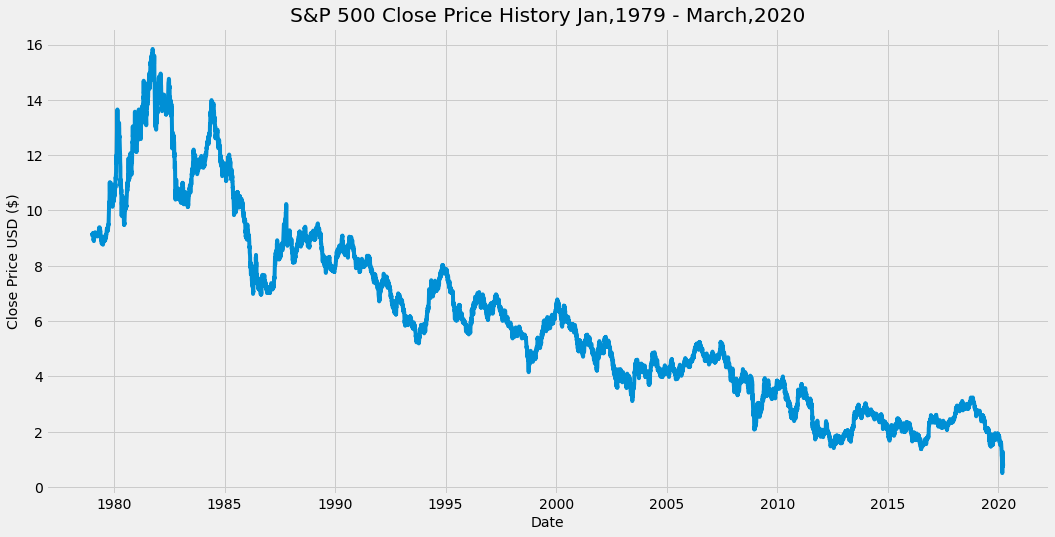

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('S&P 500 Close Price History Jan,1979 - March,2020')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

8238

In [7]:
#Scale the data: scaling or normalisation 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.56586925],
       [0.56456553],
       [0.56130628],
       ...,
       [0.04041457],
       [0.02861613],
       [0.01727397]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :] # since scale_data is an array so with ":" all values are taken

#Split the data into x_train and y_train data sets 
x_train = [] # list data format
y_train = [] # list data format

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61: #for example visualization
    print(x_train)
    print(y_train)
    print()


[array([0.56586925, 0.56456553, 0.56130628, 0.56065447, 0.56326186,
       0.56456553, 0.56456553, 0.56391366, 0.56326186, 0.56391366,
       0.56456553, 0.56586925, 0.56586925, 0.56391366, 0.56195814,
       0.56065447, 0.55935075, 0.55283224, 0.54957305, 0.55152858,
       0.55087672, 0.55087672, 0.55022485, 0.54696566, 0.55087672,
       0.55413597, 0.56000261, 0.56000261, 0.56130628, 0.56130628,
       0.56195814, 0.56195814, 0.56130628, 0.56195814, 0.56391366,
       0.56717292, 0.56782478, 0.56717292, 0.56652105, 0.56521739,
       0.56521739, 0.56456553, 0.56130628, 0.56326186, 0.56065447,
       0.56065447, 0.56130628, 0.56130628, 0.56130628, 0.56195814,
       0.56326186, 0.56195814, 0.56195814, 0.56261   , 0.56261   ,
       0.56195814, 0.56195814, 0.56195814, 0.56130628, 0.55869889])]
[0.5580470848559744]

[array([0.56586925, 0.56456553, 0.56130628, 0.56065447, 0.56326186,
       0.56456553, 0.56456553, 0.56391366, 0.56326186, 0.56391366,
       0.56456553, 0.56586925, 0.565

In [9]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)

[[0.56586925 0.56456553 0.56130628 ... 0.56195814 0.56130628 0.55869889]
 [0.56456553 0.56130628 0.56065447 ... 0.56130628 0.55869889 0.55804708]
 [0.56130628 0.56065447 0.56326186 ... 0.55869889 0.55804708 0.56130628]
 ...
 [0.10279642 0.0939313  0.09438759 ... 0.09601721 0.10123199 0.09842905]
 [0.0939313  0.09438759 0.08969428 ... 0.10123199 0.09842905 0.09536536]
 [0.09438759 0.08969428 0.07926472 ... 0.09842905 0.09536536 0.09138909]]


In [10]:
#Reshape the data: LSTM requires 3D shape of the input dataset
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8178, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1))) # 50 means number of neurons provided 
model.add(LSTM(50, return_sequences= False)) # if more layer make return sequence to true and the last layer is False
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # loss function check how will a model performed 

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) # fit is another name for train, epochs is the number of interations 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





8178/8178 [==============================] - 608s 74ms/step - loss: 5.5941e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values  
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test: y has all the vales we have to predict, x we append last 60 values
x_test = []
y_test = dataset[training_data_len:, :] # store the original values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE) # evaluate the model using RMSE
rmse = np.sqrt( np.mean( predictions- y_test )**2 )
rmse # sd of redidulas , lower value better model 

0.0295293658262552

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'Top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


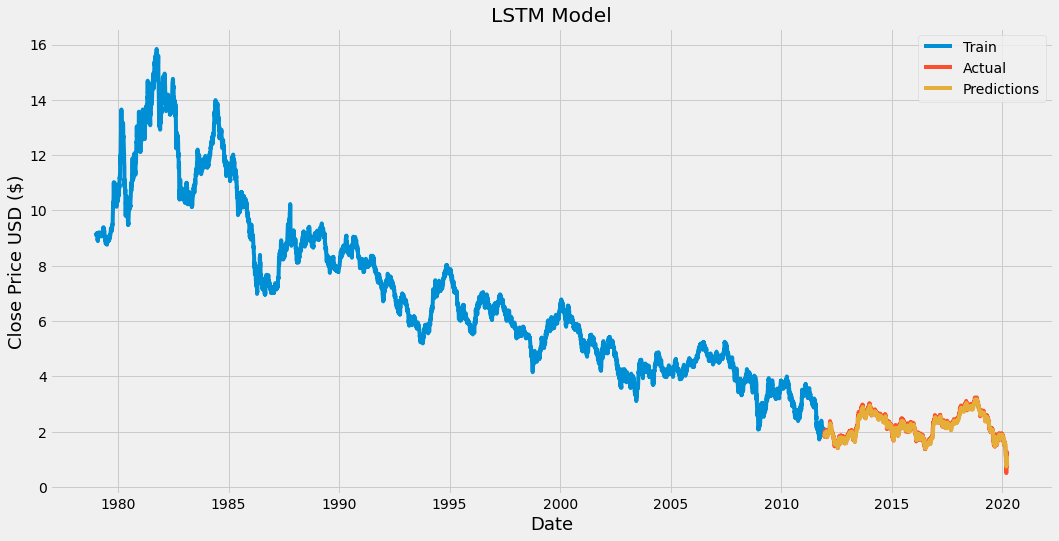

In [26]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions #adding column to valid

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='Top right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2011-12-16,1.854,1.913860
2011-12-19,1.813,1.882861
2011-12-20,1.925,1.847682
2011-12-21,1.967,1.853901
2011-12-22,1.951,1.884127
...,...,...
2020-03-17,0.997,0.858764
2020-03-18,1.266,0.898751
2020-03-19,1.119,1.018216


In [22]:
#Get the quote
apple_quote = web.DataReader("^TNX", data_source='yahoo', start='1979-01-01', end='2020-03-24')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1 using the same variable as before
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[0.89618754]]


In [24]:
#Get the quote
apple_quote2 = web.DataReader("^TNX", data_source='yahoo', start='2020-03-24', end='2020-03-24')
print(apple_quote2['Close'])

Date
2020-03-24    0.816
Name: Close, dtype: float64


In [0]:
valid.to_csv("Predicted and Actual 10yr Treasury Notes .csv")